# 2.  线性回归  
本部分基于城市用电量预测任务，包括单变量线性回归，多变量线性回归，正规方程，多项式回归五个部分。  
环境：Numpy， Pytorch

## 2.1 基本原理

线性回归是一个从输入变量到输出的线性映射，线性回归属于回归任务，输出是一个标量：

<img src="./imgs/图片1.png" alt="image-20210709154939648" style="zoom:80%;" />

线性回归模型可以表示为输入变量的线性组合：

​	$f(𝒙, 𝒘)= b + 𝑤_1𝑥_1 + ⋯ + 𝑤_𝑛𝑥_𝑛$

引入输入变量的非线性激活函数$\phi$后，表示为：

​	$f(x,w)=b+\Sigma_{j=1}^{N-1}w_j\phi(x_j)$

为了衡量拟合最好的模型，引入**损失函数**，如平方损失：

​		$J(w)=\frac{1}{2m}\Sigma^{m}_{i=1}l(f_w(x^{i}),y^i)=\frac{1}{2m}\Sigma^{m}_{i=1}(f_w(x^{i})-y^i)^2$

我们的目标是是损失函数最小化：

​	$min_wJ(w)$

通常我们使用**梯度下降法**令损失函向最大梯度的反方向移动，以此达到局部最小值：

<img src="./imgs/图片2.png" alt="image-20210709173337304" style="zoom:80%;" />

对于平方损失，重复更新权重w，损失将一步一步下降，直到达到局部最小值：

​	$w_i = w_i-\eta \Sigma_n-(y^n-f_w(x^n))x_i^n$

<img src="./imgs/图片3.png" alt="image-20210709174139203" style="zoom:40%;" />

## 2.2 基于numpy的线性回归
### 任务背景：
电网系统需要考虑最高温度对城市的峰值用电量的影响，项目负责人需要预测明天城市的峰值用电量。 现在，负责人提供了他搜集到的温度-用电量数据，并请求你帮他训练出一个模型，这个模型能够很好地预测明天城市的峰值用电量。

### 2.2.1 准备

导入python包

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

导入数据，可视化数据

   High temperature  Population  Peak demand
0             38.79        0.63         4.21
1             37.53        0.56         2.84
2             32.93        1.04         3.11
3             25.82        1.02         3.32
4             20.89        1.10         2.42
X shape: (80, 1)
Y shape: (80, 1)


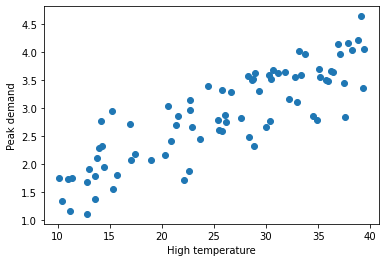

In [11]:
#data 第一列为温度信息 第二列为人口信息 第三列为用电量信息
data = np.loadtxt('./data/data.txt')
df = pd.DataFrame({'High temperature':data[:,0],'Population':data[:,1],'Peak demand':data[:,2]})
print(df.head())
X = data[:,0].reshape(-1,1)
Y = data[:,2].reshape(-1,1)

plt.xlabel('High temperature')
plt.ylabel('Peak demand')
plt.scatter(X,Y)
print('X shape:',X.shape)
print('Y shape:',Y.shape)

### 2.2.2 单变量线性回归

使用回归算法来训练一个模型，用来预测明天城市的峰值用电量。

### 单变量线性回归模型表示
$$Peak\ demand \approx \theta_0 + \theta_1 \cdot (High\ temperature)$$
![functions](imgs/lines.jpg)
单变量线性回归的模型由两个参数$\theta_0$,$\theta_1$来表示一条直线。我们的目标也就是找到一个"最符合"的直线或者说参数$\theta_i$如何选择。

设输入的特征——最高温度(F)为$x^{(i)} \in \mathbb{R}^{n+1}$，$i=1,\cdots,m$。$m$为样本总数，在该例子中为**$m=80$**。$n$为特征的个数，这里为$1$。
$$
x^{(i)} \in \mathbb{R}^2 = \begin{bmatrix} 1 \\ \text{high temperature for day i} \end{bmatrix}
$$

设输出为$y^{(i)} \in \mathbb{R}$，表示第$i$天的峰值用电量。

参数为$\theta \in \mathbb{R}^{n+1} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix}$

在该例子中，模型应该为一条直线，假设模型为：
$$h_{\theta}(x) = \theta^T x = \theta_0 + \theta_1 x $$
**注意**：这里的$\theta^T$是一个向量，$\theta_0,\theta_1$是标量。使用向量化的表示原因（1）简化数学公式的书写（2）与程序代码中的表示可以一致，使用向量化的代码表示可以加速运算，因此一般能不用`for`循环的地方都不用`for`循环。
### 损失函数

模型的预测结果和实际结果有差距，为了衡量它们之间的差距，或者说使用这个模型产生的损失，我们定义损失函数$l(h_\theta(x), y)$。这里我们使用平方损失：
$$
l(h_\theta(x), y) = \left ( h_\theta(x) - y \right )^2
$$

上述损失函数表示一个样本的损失，训练集的损失使用$J(\theta)$表示：
$$
\begin{aligned}
J(\theta) & = \frac{1}{2m} \sum_{i=1}^{m}l(h_\theta(x^{(i)}), y^{(i)}) \\
& = \frac{1}{2m} \sum_{i=1}^{m} \left ( h_\theta(x^{(i)}) - y^{(i)} \right )^2 \\
& = \frac{1}{2m} \sum_{i=1}^{m} \left ( \theta^T x^{(i)} - y^{(i)} \right )^2
\end{aligned}
$$

为了使模型的预测效果好，需要最小化训练集上的损失，$\underset{\theta}{\text{minimize}} J(\theta)$。

### 梯度下降法

为了得到使得损失函数$J(\theta)$最小化的$\theta$，可以使用梯度下降法。

损失函数$J(\theta)$的函数图像如下
![损失函数J](imgs/loss_function_j.png)

损失函数$J(\theta)$关于参数向量$\theta$中的一个参数比如$\theta_1$的函数图是
![theta-J 函数图](imgs/theta-J.png)

假设一开始$J(\theta)$的值在紫色点上，为了降低$J(\theta)$值，需要$\theta_1$往右变移动，这个方向是$J(\theta)$在$\theta_1$上的负梯度。只要$\theta$不断往负梯度方向移动，$J(\theta)$一定可以降到最低值。梯度下降法就是使参数$\theta$不断往负梯度移动，经过有限次迭代(更新$\theta$值)之后，损失函数$J(\theta)$达到最低值。

梯度下降法的过程：
1. 初始化参数向量$\theta$。
2. 开始迭代：
  1. 计算损失函数$J(\theta)$，
  2. 计算$\theta$的梯度，
  3. 更新参数$\theta$。



现在开始实现 Regression 学习算法。

**任务1：** 首先在$X$前面加上一列1，表示参数$\theta_0$的系数，方便运算。$X$是形状为$(m,1)$的矩阵，一共$m$行数据，需要为每一行数据的前面加一列1
$$
\begin{bmatrix} x^{(0)} \\ x^{(1)} \\ \vdots \\x^{(m-1)}  \end{bmatrix} \longrightarrow
\begin{bmatrix} 1\quad x^{(0)} \\ 1\quad x^{(1)} \\ \vdots \\ 1\ x^{(m-1)}  \end{bmatrix}
$$
提示：可以使用`np.hstack`把两个矩阵水平合在一起。用1初始化向量或矩阵的函数是`np.ones`。

In [53]:
def preprocess_data(X):
    """输入预处理 在X前面加一列1
    参数：
        X:原始数据，shape为 mx1
    返回：
        X_train: 在X加一列1的数据，shape为 mx2
    """

    m = X.shape[0]   # m 是数据X的行数
    ### START CODE HERE ###
    
    X_train = np.hstack((np.ones((m,1)),X))
    
    ### END CODE HERE ###
    return X_train

In [54]:
X = preprocess_data(X)
print('new X shape:',X.shape)
print('Y shape:',Y.shape)
print('new X[:10,:]=\n',X[:5,:])

new X shape: (80, 2)
Y shape: (80, 1)
new X[:10,:]=
 [[ 1.   38.79]
 [ 1.   37.53]
 [ 1.   32.93]
 [ 1.   25.82]
 [ 1.   20.89]]


**任务2：** 初始化参数向量$\theta$。$\theta$的shape是$(2,1)$，随机初始化$\theta$。

提示：numpy的随机函数是`np.random.rand`。

In [55]:
def init_parameter(shape):
    """初始化参数
    参数：
        shape: 参数形状
    返回：
        theta_init: 初始化后的参数
    
    """
    np.random.seed(0)
    
    ### START CODE HERE ###

    theta_init = np.random.rand(*shape)

    ### END CODE HERE ###
    
    return theta_init

In [56]:
theta = init_parameter((2,1))
print('theta shape is',theta.shape)
print('theta = \n',theta)

theta shape is (2, 1)
theta = 
 [[0.5488135 ]
 [0.71518937]]


**任务3：** 实现计算损失函数$J(\theta)$的函数。   
从公式$$
\begin{aligned}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left ( \theta^T x^{(i)} - y^{(i)} \right )^2
\end{aligned}
$$
由于使用`for`循环效率不高，因此用向量化的方法去掉`for`循环。$X$ 大小为$m \times (n+1)$($n$表示特征数量，对于这里$n=1$)，每行是一条样本特征向量，$\theta$ 大小为$(n+1) \times 1$，可以使用$X \theta$计算所有样本的预测结果,大小为$m\times 1$，接着$(X \theta - Y)^2$计算所有样本的损失值，最后求和并除以$2m$得到$J(\theta)$的值。因此，这里的线性模型就可以表示为
$$h_{\theta}(X) = X\theta$$ $h_{\theta}(X)$的大小为$m\times 1$，$J(\theta)$应该是一个标量   
提示：矩阵乘法运算可使用`np.dot`函数，平方运算可使用`np.power(data, 2)`函数，求和运算可使用`np.sum`。

In [57]:
def compute_J(X, Y, theta):
    """计算损失函数J
    参数：
        X: 训练集数据特征，shape: (m, 2)
        Y: 训练集数据标签，shape: (m, 1)
        theta: 参数，shape: (2, 1)
        
    返回：
        loss: 损失值
    """
    
    m = X.shape[0]
    
    ### START CODE HERE ###

    h_theta = np.dot(X, theta)
    loss = np.sum(np.power(h_theta-Y, 2))/(2*m)
    
    ### END CODE HERE ###
    
    return loss

In [58]:
first_loss = compute_J(X, Y, theta)
print("first_loss = ", first_loss)

first_loss =  145.4723573288773


**任务4**:计算参数$\theta$的梯度。  
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left ( \theta^T x^{(i)} - y \right ) x_j^{(i)}
$$
向量化公式为
$$
\text{gradients} =\frac{1}{m} X^T (X \theta - Y) 
$$
提示：矩阵A的转置表示为`A.T`

In [59]:
def compute_gradient(X, Y, theta):
    """计算参数theta的梯度值
    参数：
        X: 训练集数据特征，shape: (m, 2)
        Y: 训练集数据标签，shape: (m, 1)
        theta: 参数，shape: (2, 1)
        
    返回：
        gradients: theta的梯度列表 shape:(2,1)
    """
    
    m = X.shape[0]
    gradients = None
    
    ### START CODE HERE ###

    gradients = np.dot(X.T, (np.dot(X, theta)-Y))/m

    ### END CODE HERE ###
    
    return gradients

In [60]:
gradients_first = compute_gradient(X, Y, theta)
print("gradients_first shape : ", gradients_first.shape)
print("gradients_first = ", gradients_first)


gradients_first shape :  (2, 1)
gradients_first =  [[ 16.10362006]
 [464.4922825 ]]


**任务5**:用梯度下降法更新参数$\theta$  
实现`update_parameters`函数。

In [61]:
def update_parameters(theta, gradients, learning_rate=0.01):
    """更新参数theta
    参数：
        theta: 参数，shape: (2, 1)
        gradients: 梯度，shape: (2, 1)
        learning_rate: 学习率，默认为0.01
        
    返回：
        parameters: 更新后的参数
    """
    ### START CODE HERE ###

    parameters = theta-learning_rate*gradients

    ### END CODE HERE ###
    
    return parameters

In [62]:
theta_one_iter = update_parameters(theta, gradients_first)

print("theta_one_iter = ", theta_one_iter)

theta_one_iter =  [[ 0.3877773 ]
 [-3.92973346]]


**任务6**：将前面定义的函数整合起来，实现完整的模型训练函数。迭代更新$\theta$ `iter_num`次。迭代次数参数`iter_num`也是一个超参数，如果`iter_num`太小，损失函数$J(\theta)$还没有收敛；如果`iter_num`太大，损失函数$J(\theta)$早就收敛了，过多的迭代浪费时间。

In [63]:
def model(X, Y, theta, iter_num = 100, learning_rate=0.0001):
    """梯度下降函数
    参数：
        X: 训练集数据特征，shape: (m, n+1)
        Y: 训练集数据标签，shape: (m, 1)
        iter_num: 梯度下降的迭代次数
        theta: 初始化的参数，shape: (n+1, 1)
    返回：
        loss_history: 每次迭代的损失值
        theta_history: 每次迭代更新后的参数
        theta: 训练得到的参数
    """
    
    loss_history = []
    theta_history = []
    
    for i in range(iter_num):
        
        ### START CODE HERE ###
        
        loss = compute_J(X, Y, theta)
        gradients = compute_gradient(X, Y, theta)
        theta = update_parameters(theta, gradients, learning_rate)

        ### END CODE HERE ###
        
        loss_history.append(loss)
        theta_history.append(theta)
    
    return loss_history, theta_history, theta

theta = 
 [[0.52741588]
 [0.09023805]]
loss =  0.0930181186193844


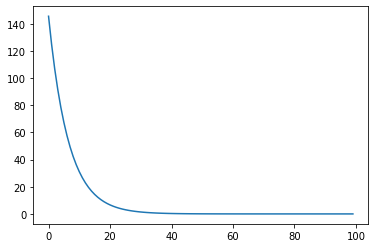

In [64]:
loss_history, theta_history, theta = model(X, Y, theta, learning_rate=0.0001)
print("theta = \n", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

下面是学习到的线性模型与原始数据的关系

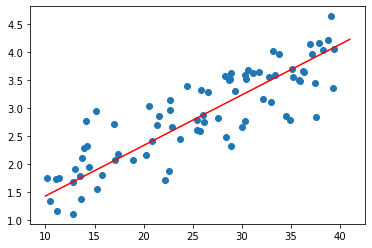

In [65]:
plt.scatter(X[:,1],Y)
x = np.arange(10,42)
plt.plot(x,x*theta[1][0]+theta[0][0],'r')

### 2.2.3 多变量线性回归
上述例子时单变量回归的例子，样本的特征只有一个一天的最高温度。负责人进过分析后发现，城市一天的峰值用电量还与城市人口有关系，因此，他在回归模型中添加城市人口变量$x_2$，你的任务是训练这个多变量回归方程：
$$
h(x) = \theta^T x = \theta_0 * 1 + \theta_1 * x_1 + \theta_2 * x_2
$$
之前实现的梯度下降法使用的对象是$\theta$和$X$向量，所示实现的梯度下降函数适用单变量回归和多变量回归。这里可以看到使用向量化的公式在多变量回归里依然不变，因此代码也基本一样,直接调用前面实现的函数即可。

**任务7：** 现在，训练一个多变量回归模型。

theta =  [[0.526022  ]
 [0.06720419]
 [0.57591482]]
loss =  0.10571180408810799


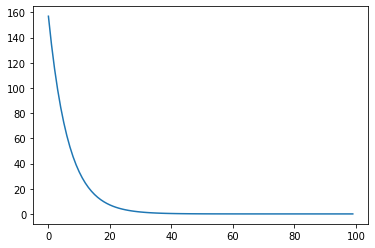

In [18]:
#读取数据，X的前两列
X = data[:,0:2].reshape(-1, 2)
Y = data[:,2].reshape(-1, 1)

### START CODE HERE ###

# 同样为X的前面添加一列1,使得X的shape从100x2 -> 100x3
X = preprocess_data(X)
# 初始化参数theta ,theta的shape应为 3x1
theta = init_parameter((3,1))
#传入模型训练 learning_rate设为0.0001
loss_history, theta_history, theta = model(X, Y, theta, iter_num = 100, learning_rate=0.0001)

### END CODE HERE ###
print("theta = ", theta)

plt.plot(loss_history)
print("loss = ", loss_history[-1])

### 特征归一化

特征归一化可以确保特征在相同的尺度，加快梯度下降的收敛过程。

**任务8：** 对数据进行零均值单位方差归一化处理。零均值单位方差归一化公式：
$$
x_i = \frac{x_i - \mu_i}{\sigma_i}
$$
其中$i$表示第$i$个特征，$\mu_i$表示第$i$个特征的均值，$\sigma_i$表示第$i$个特征的标准差。进行零均值单位方差归一化处理后，数据符合标准正态分布，即均值为0，标准差为1。  
**注意**，使用新样本进行预测时，需要对样本的特征进行相同的缩放处理。

提示：求特征的均值，使用numpy的函数`np.mean`，求特征的标准差，使用numpy的函数`np.std`，需要注意对哪个维度求均值和标准差。比如，对矩阵A对每一行求均值`np.mean(A,axis=0)`

mu =  [25.77175  1.1355 ]
sigma =  [8.82317046 0.35648247]
theta =  [[2.87687827]
 [0.69766231]
 [0.03497325]]
loss =  0.08778900945492227


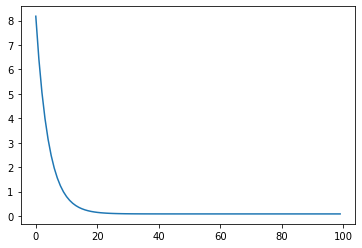

In [39]:
X = data[:,0:2].reshape((-1, 2))
Y = data[:,2].reshape((-1, 1))

### START CODE HERE ###

# 计算特征的均值 mu
mu = np.mean(X, axis=0)
# 计算特征的标准差 sigma
sigma = np.std(X, axis=0)
# 零均值单位方差归一化
X_norm = (X-mu)/sigma

### END CODE HERE ###

# 训练多变量回归模型
# X_norm前面加一列1
X = preprocess_data(X_norm)

theta = np.array([3,3,3]).reshape(3,1)#init_parameter((3,1))

# 学习率使用0.1
loss_history, theta_history, theta = model(X, Y, theta, learning_rate=0.1)

print("mu = ", mu)
print("sigma = ", sigma)
print("theta = ", theta)
plt.plot(loss_history)
print("loss = ", loss_history[-1])

我们来直观地了解特征尺度归一化的梯度下降的过程。这里只展示单变量回归梯度下降过程。

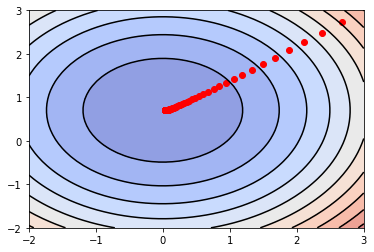

In [40]:
X_show = X[:,0:2]
X_show = preprocess_data(X_show)

theta_0 = np.linspace(-2, 3, 50)
theta_1 = np.linspace(-2, 3, 50)
theta_0, theta_1 = np.meshgrid(theta_0,theta_1)
J = np.zeros_like(theta_0)

for i in range(50):
    for j in range(50):
        J[i,j] = compute_J(X_show, Y, np.array([[2.877],[theta_0[i,j]],[theta_1[i,j]]]))

plt.contourf(theta_0, theta_1, J, 10, alpha = 0.6, cmap = plt.cm.coolwarm)
C = plt.contour(theta_0, theta_1, J, 10, colors = 'black')

# 画出损失函数J的历史位置
history_num = len(theta_history)
theta_0_history = np.zeros(history_num)
theta_1_history = np.zeros(history_num)
for i in range(history_num):
    theta_0_history[i],theta_1_history[i] = theta_history[i][2,0],theta_history[i][1,0]
plt.scatter(theta_0_history, theta_1_history, c="r")

可以看到，$J(\theta)$的值不断地往最低点移动。与没有进行特征尺度归一化的图相比，归一化后，每个维度的变化幅度大致相同，这有助于$J(\theta)$的值快速下降到最低点。

## 2.3 使用Pytorch完成线性回归任务

我们继续使用城市用电预测任务，这次使用Pytorch框架设计线性回归算法，使用继承nn.Module()类的nn.Linear()类

nn.Linear(in_features, out_features): 用于设置网络中的全连接层，需要注意的是全连接层的输入与输出都是二维张量。  
    in_features指的是输入的二维张量的大小，即输入的[batch_size, size]中的size。  
    out_features指的是输出的二维张量的大小，即输出的二维张量的形状为[batch_size，output_size]，当然，它也代表了该全连接层的神经元个数。


### 定义LinearRegression类
首先进行定义，只包含一层nn.Linear(),需要完成初始化函数init，在其中设计我们的线性层，及前向传播forward函数。

In [30]:
import torch

class LinearRegression(torch.nn.Module):
    """
    模型包含一层nn.Linear类，输入大小2，输出大小1
    """
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(2,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out

model = LinearRegression()

### 定义损失函数：平方损失 & 定义优化算法：SGD

In [31]:
learning_rate = 1e-3
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 定义数据集，转化为Tensor格式

In [32]:
X = data[:,0:2].reshape(-1, 2)
Y = data[:,2].reshape(-1, 1)
x = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(Y.astype(np.float32))
print(x.shape, y.shape)

torch.Size([80, 2]) torch.Size([80, 1])


### 训练：共20个epoch，损失最终降至0.1865

In [33]:
epoches = 20

for epoch in range(epoches):
    pred = model(x)
    loss = loss_function(pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print("epoch: {}, loss: {}".format(epoch, loss.item()))

epoch: 0, loss: 147.07382202148438
epoch: 1, loss: 35.20121383666992
epoch: 2, loss: 8.533326148986816
epoch: 3, loss: 2.176311731338501
epoch: 4, loss: 0.6609387993812561
epoch: 5, loss: 0.29970043897628784
epoch: 6, loss: 0.2135808914899826
epoch: 7, loss: 0.1930435597896576
epoch: 8, loss: 0.18813934922218323
epoch: 9, loss: 0.1869617998600006
epoch: 10, loss: 0.186672642827034
epoch: 11, loss: 0.18659521639347076
epoch: 12, loss: 0.1865682750940323
epoch: 13, loss: 0.18655340373516083
epoch: 14, loss: 0.1865413635969162
epoch: 15, loss: 0.18653005361557007
epoch: 16, loss: 0.18651893734931946
epoch: 17, loss: 0.18650783598423004
epoch: 18, loss: 0.1864967793226242
epoch: 19, loss: 0.18648575246334076
